# Step 1: Basic EDA for Regression — Target: `final_grade`

## Summary Statistics for Numerical Features

,count,mean,std,min,25%,50%,75%,max
age,500.0,19.81400,2.522723,17.00,17.0000,20.00,21.000,31.00
previous_gpa,500.0,2.71436,0.667223,0.81,2.2875,2.72,3.160,4.00
attendance_rate,500.0,0.71760,0.149643,0.28,0.6200,0.74,0.830,0.99
participation_score,500.0,6.91020,1.854679,1.70,5.6000,6.90,8.300,10.00
assignment_completion,500.0,71.35040,15.501443,29.00,60.4750,72.80,83.725,99.50
study_hours_per_week,500.0,5.80860,3.340207,0.70,3.5000,5.20,7.700,21.80
digital_literacy,500.0,6.90360,1.886899,1.60,5.6000,6.90,8.400,10.00
previous_course_failures,500.0,0.27000,0.511491,0.00,0.0000,0.00,0.000,2.00
extracurricular_hours,500.0,3.07120,2.426897,0.00,1.1000,2.50,4.225,13.00
work_hours_per_week,500.0,9.21200,10.579173,0.00,0.0000,5.00,17.000,48.00


## Missing Values

No missing values found.

## Skewness of Numerical Features

,Skewness
previous_course_failures,1.735323
study_hours_per_week,1.210231
distance_from_campus,1.158623
extracurricular_hours,1.133014
work_hours_per_week,0.910221
age,0.822904
previous_gpa,-0.086276
participation_score,-0.171453
digital_literacy,-0.219542
assignment_completion,-0.404533



**Interpretation Tip:**  
- |Skew| > 1: Highly skewed → consider log/sqrt transformation  
- 0.5 < |Skew| < 1: Moderately skewed  
- |Skew| < 0.5: Approximately symmetric


## Correlation Matrix (Heatmap)

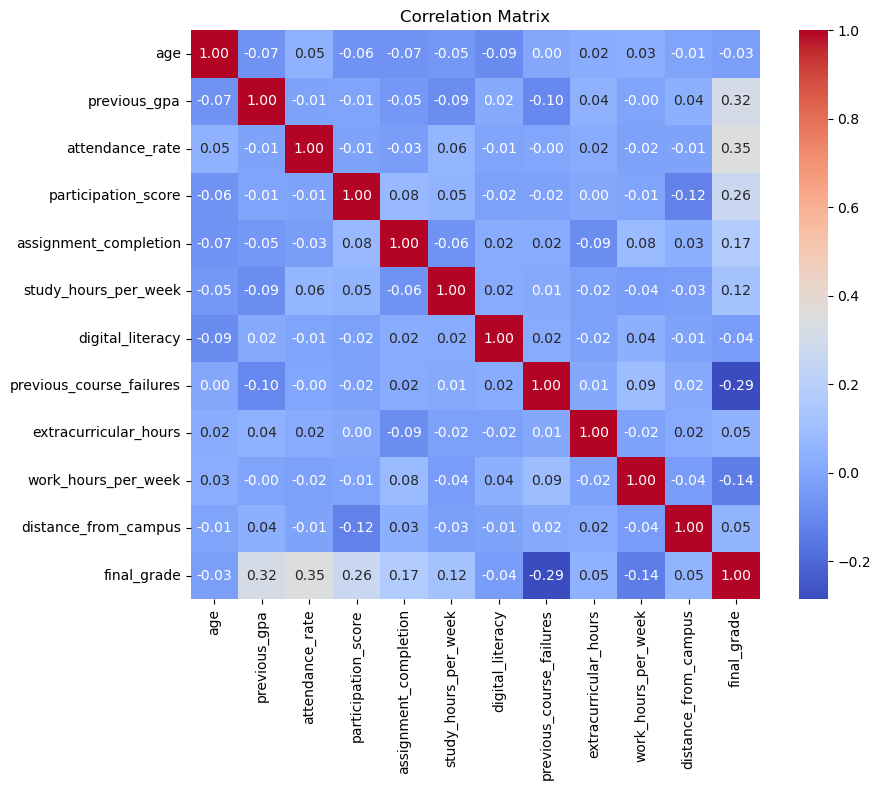

## Correlation with Target `final_grade`

,Correlation
attendance_rate,0.354536
previous_gpa,0.316125
participation_score,0.262517
assignment_completion,0.170208
study_hours_per_week,0.119064
distance_from_campus,0.051017
extracurricular_hours,0.050209
age,-0.027188
digital_literacy,-0.037006
work_hours_per_week,-0.138253



**Interpretation Tip:**  
- Strong predictors typically have correlation |r| > 0.3  
- Negative values indicate inverse relationships


## Distribution of Numerical Features

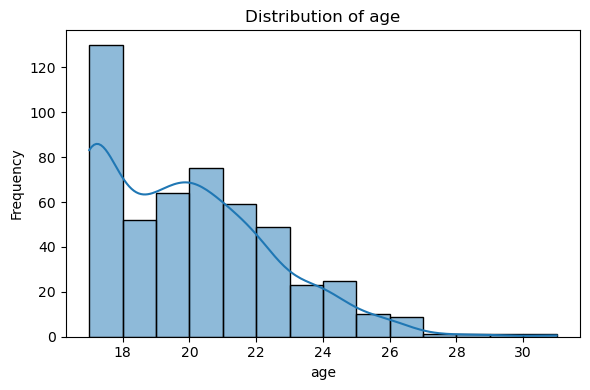

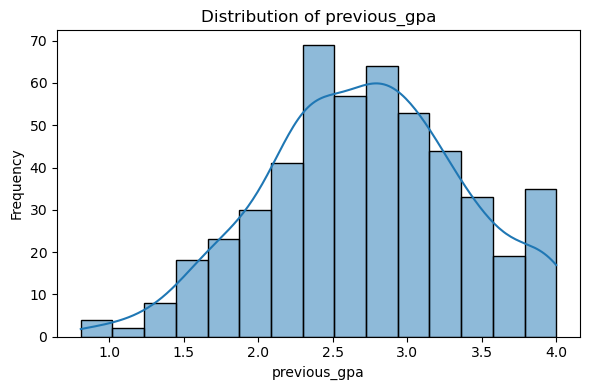

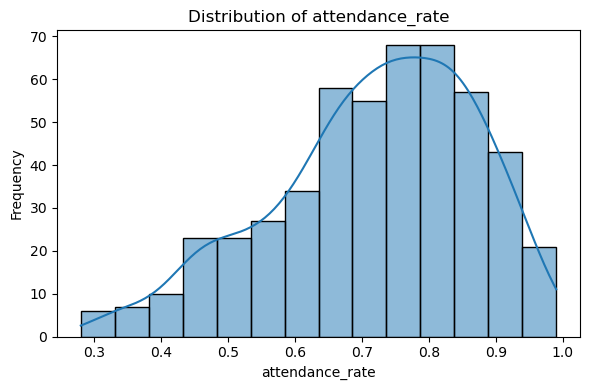

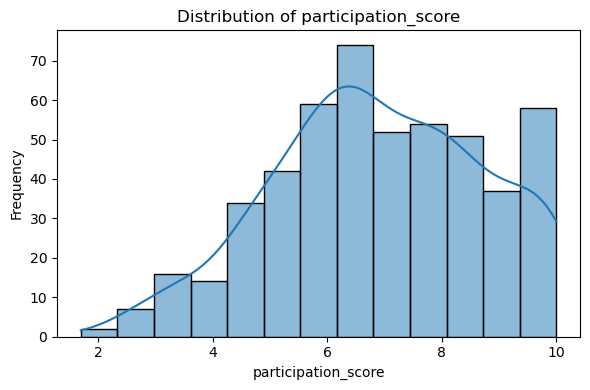

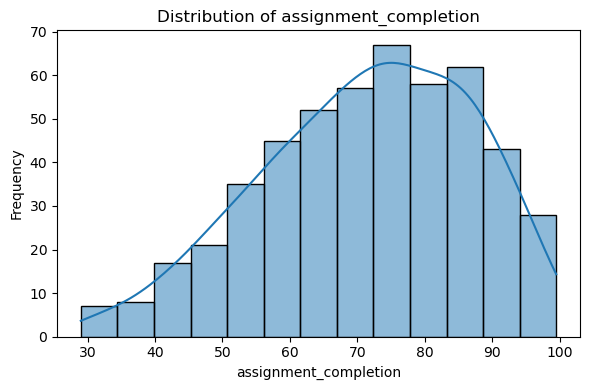

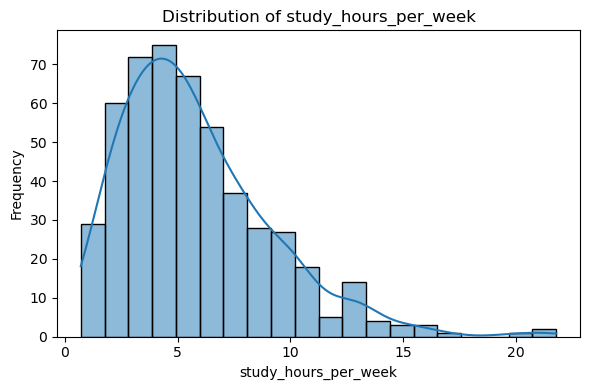

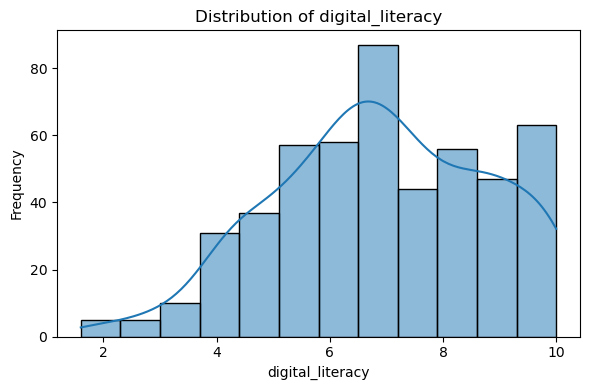

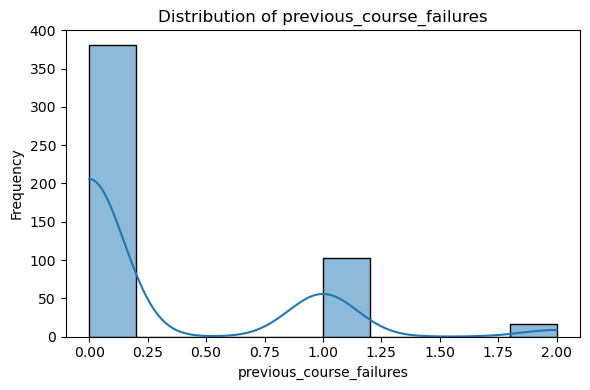

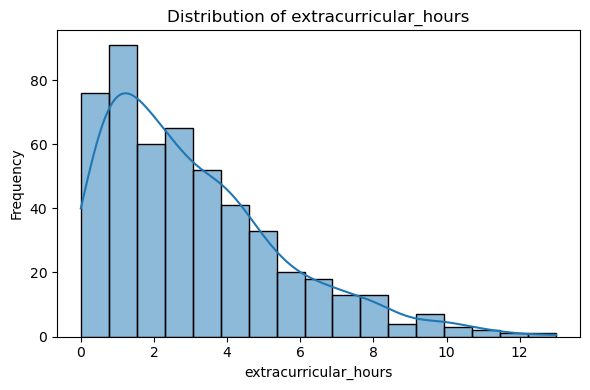

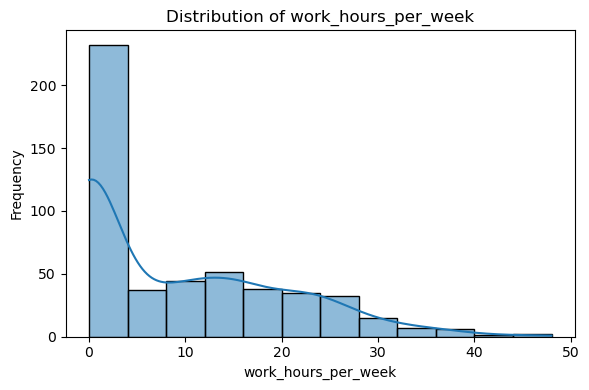

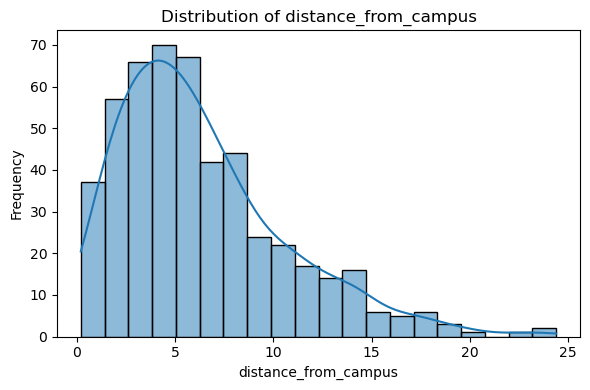

## Feature Relationships with Target (`final_grade`)

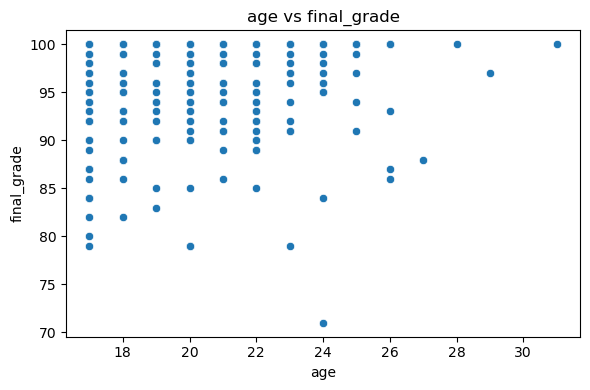

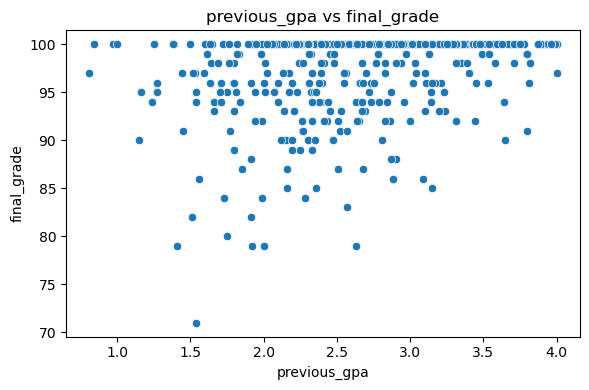

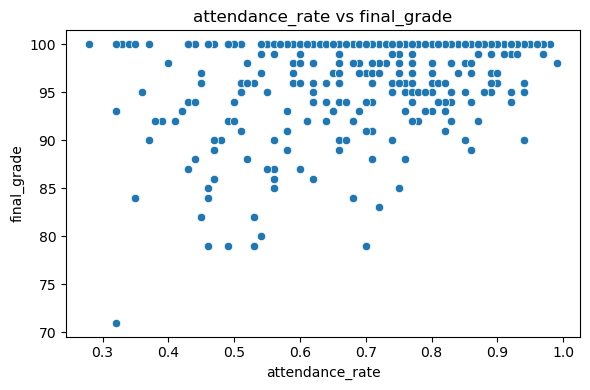

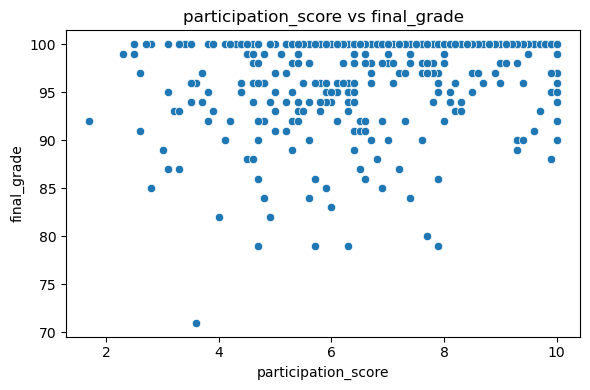

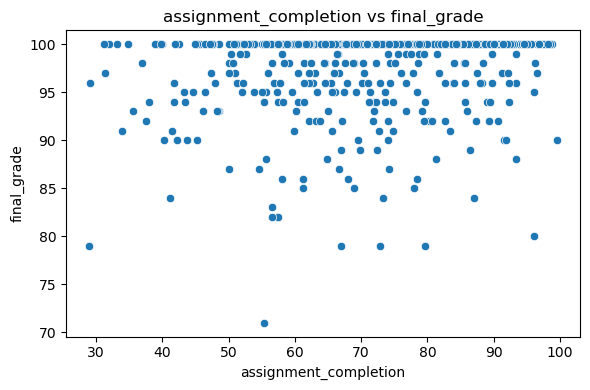

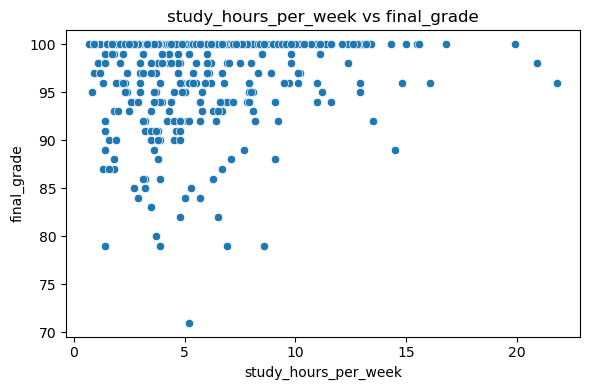

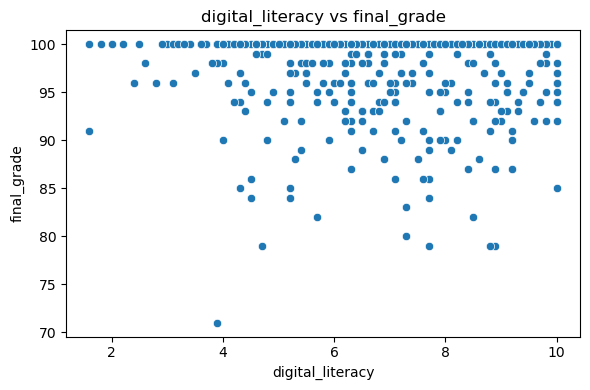

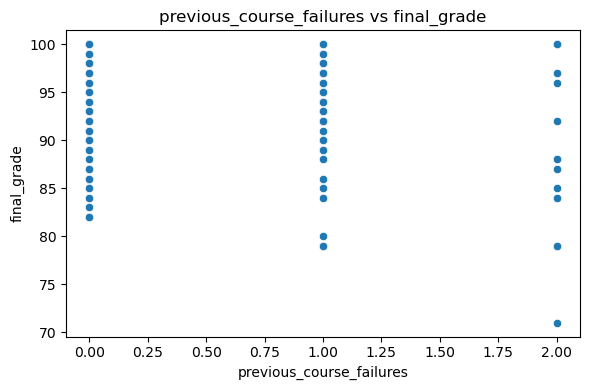

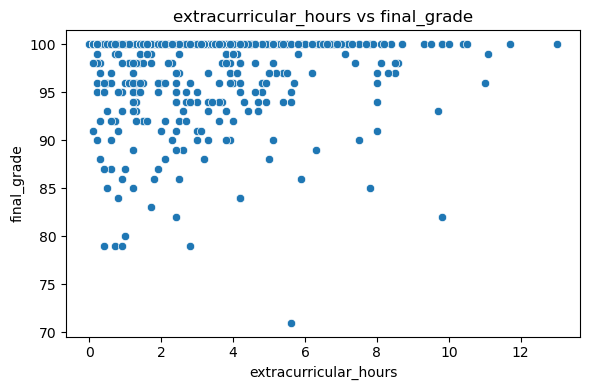

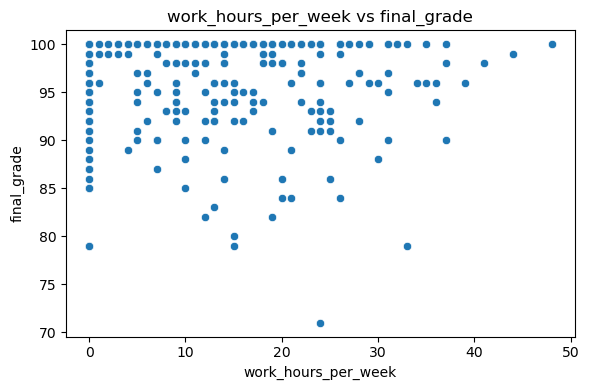

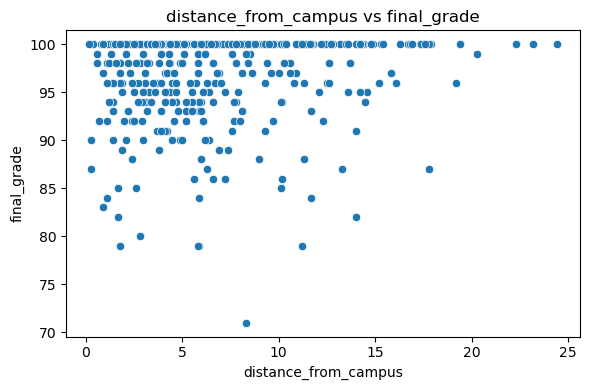

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

def basic_eda_for_regression_notebook(df, target_col, display_plots=True):
    """
    Perform basic EDA for regression and generate Markdown reporting in a Jupyter Notebook.
    
    Parameters:
        df (pd.DataFrame): Dataset.
        target_col (str): Numeric target column for regression.
        display_plots (bool): Whether to show plots.
    """
    
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

    if target_col not in numerical_cols:
        raise ValueError("Target column must be numeric.")

    feature_cols = [col for col in numerical_cols if col != target_col]

    display(Markdown(f"# Step 1: Basic EDA for Regression — Target: `{target_col}`"))

    # ---------------- Summary Statistics ----------------
    summary_stats = df[numerical_cols].describe().T
    display(Markdown("## Summary Statistics for Numerical Features"))
    display(summary_stats)

    # ---------------- Missing Values ----------------
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]

    display(Markdown("## Missing Values"))
    if missing_values.empty:
        display(Markdown("No missing values found."))
    else:
        display(missing_values)

    # ---------------- Skewness ----------------
    skewness = df[feature_cols].skew().sort_values(ascending=False)
    display(Markdown("## Skewness of Numerical Features"))
    display(skewness.to_frame(name='Skewness'))

    display(Markdown("""
**Interpretation Tip:**  
- |Skew| > 1: Highly skewed → consider log/sqrt transformation  
- 0.5 < |Skew| < 1: Moderately skewed  
- |Skew| < 0.5: Approximately symmetric
"""))

    # ---------------- Correlation Matrix ----------------
    correlation_matrix = df[numerical_cols].corr()
    display(Markdown("## Correlation Matrix (Heatmap)"))

    if display_plots:
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
        plt.title("Correlation Matrix")
        plt.tight_layout()
        plt.show()

    # ---------------- Correlation with Target ----------------
    correlations_with_target = correlation_matrix[target_col].drop(target_col).sort_values(ascending=False)
    display(Markdown(f"## Correlation with Target `{target_col}`"))
    display(correlations_with_target.to_frame(name='Correlation'))

    display(Markdown("""
**Interpretation Tip:**  
- Strong predictors typically have correlation |r| > 0.3  
- Negative values indicate inverse relationships
"""))

    # ---------------- Histograms ----------------
    if display_plots:
        display(Markdown("## Distribution of Numerical Features"))
        for col in feature_cols:
            plt.figure(figsize=(6, 4))
            sns.histplot(df[col].dropna(), kde=True)
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.tight_layout()
            plt.show()

    # ---------------- Scatter Plots vs Target ----------------
    if display_plots:
        display(Markdown(f"## Feature Relationships with Target (`{target_col}`)"))
        for col in feature_cols:
            plt.figure(figsize=(6, 4))
            sns.scatterplot(x=df[col], y=df[target_col])
            plt.title(f'{col} vs {target_col}')
            plt.xlabel(col)
            plt.ylabel(target_col)
            plt.tight_layout()
            plt.show()

df = pd.read_csv("../data/student_success_dataset.csv")
# drop student_id column
df.drop("student_id", axis=1, inplace=True)
basic_eda_for_regression_notebook(df, target_col="final_grade")

## Step 2. Data Preprocessing

In [10]:
from sklearn.preprocessing import StandardScaler
from IPython.display import display, Markdown
import pandas as pd

def preprocess_for_regression_notebook(df, target_col, ordinal_mappings=None, drop_threshold=0.5):
    """
    Preprocess dataset for regression:
    - Drop columns with excessive missing values
    - Impute missing values
    - Encode categorical variables (ordinal + one-hot)
    - Standardize numerical features
    - Markdown reporting for each step

    Parameters:
        df (pd.DataFrame): The dataset
        target_col (str): Name of the target column
        ordinal_mappings (dict): Dictionary of {column: ordered list of categories}
        drop_threshold (float): Drop columns with missingness > this ratio

    Returns:
        pd.DataFrame: Cleaned dataset
    """
    df = df.copy()
    display(Markdown("## Step 2: Data Preprocessing for Regression"))

    # Drop columns with excessive missingness
    null_ratios = df.isnull().mean()
    cols_to_drop = null_ratios[null_ratios > drop_threshold].index.tolist()
    df.drop(columns=cols_to_drop, inplace=True)
    if cols_to_drop:
        display(Markdown(f"### Dropped Columns (>{drop_threshold*100:.0f}% missing):"))
        display(cols_to_drop)
    else:
        display(Markdown("### No columns dropped due to missingness."))

    # Identify columns
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(target_col, errors='ignore')
    categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

    # Impute missing values
    for col in numerical_cols:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].median(), inplace=True)
    for col in categorical_cols:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].mode()[0], inplace=True)
    display(Markdown("### Imputation Applied"))
    display(Markdown("- Numerical: filled with median<br>- Categorical: filled with mode"))

    # Ordinal encoding
    if ordinal_mappings:
        for col, order in ordinal_mappings.items():
            dtype = pd.api.types.CategoricalDtype(categories=order, ordered=True)
            df[col] = df[col].astype(dtype).cat.codes
        display(Markdown("### Ordinal Encoding Applied"))
        display(pd.DataFrame.from_dict(ordinal_mappings, orient='index'))


    # One-hot encode remaining categoricals
    onehot_cols = [col for col in categorical_cols if col not in (ordinal_mappings or {})]
    df = pd.get_dummies(df, columns=onehot_cols, drop_first=True)
    if onehot_cols:
        display(Markdown("### One-Hot Encoding Applied"))
        display(onehot_cols)
    else:
        display(Markdown("### No One-Hot Encoding Needed"))

    # Standardize numerical features (excluding target)
    scaler = StandardScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    display(Markdown("### Standardized Numerical Features (Z-score)"))
    display(numerical_cols.tolist())

    display(Markdown("### ✅ Preprocessing Complete — Data Ready for Modeling"))
    return df

ordinal_mappings = {
    'socioeconomic_status': ['Low', 'Middle', 'High'],
    'family_support': ['Low', 'Medium', 'High']
}

cleaned_df = preprocess_for_regression_notebook(
    df,
    target_col='final_grade',
    ordinal_mappings=ordinal_mappings
)


## Step 2: Data Preprocessing for Regression

### No columns dropped due to missingness.

### Imputation Applied

- Numerical: filled with median<br>- Categorical: filled with mode

### Ordinal Encoding Applied

,0,1,2
socioeconomic_status,Low,Middle,High
family_support,Low,Medium,High


### One-Hot Encoding Applied

['gender',
 'study_resources',
 'first_generation_student',
 'program_of_study',
 'completed_course']

### Standardized Numerical Features (Z-score)

['age',
 'previous_gpa',
 'attendance_rate',
 'participation_score',
 'assignment_completion',
 'study_hours_per_week',
 'digital_literacy',
 'previous_course_failures',
 'extracurricular_hours',
 'work_hours_per_week',
 'distance_from_campus']

### ✅ Preprocessing Complete — Data Ready for Modeling

In [15]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Lasso
from IPython.display import display, Markdown
import pandas as pd
import numpy as np

def feature_engineering_selection(df, target_col='final_grade', top_n_features=15, correlation_threshold=0.85):
    """
    Step 3: Feature Engineering (no polynomial features)
    - Selects top correlated features
    - Removes multicollinear features
    - Applies RFE and Lasso for final selection

    Returns:
        pd.DataFrame with selected features and target
    """
    display(Markdown("## Step 3: Feature Engineering (No Polynomial Features)"))

    # 1. Correlation with target
    corr = df.corr()[target_col].drop(target_col).abs().sort_values(ascending=False)
    top_features = corr.head(top_n_features).index.tolist()
    display(Markdown(f"### 1. Top {top_n_features} Features by Correlation with `{target_col}`"))
    display(corr.head(top_n_features))

    X = df[top_features]
    y = df[target_col]

    # 2. Remove highly correlated (multicollinearity)
    corr_matrix = X.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [col for col in upper.columns if any(upper[col] > correlation_threshold)]
    X_filtered = X.drop(columns=to_drop)
    display(Markdown(f"### 2. Removed {len(to_drop)} Multicollinear Features (r > {correlation_threshold})"))
    if to_drop:
        display(to_drop)

    # 3. Feature selection with RFE
    rfe = RFE(LinearRegression(), n_features_to_select=min(10, X_filtered.shape[1]))
    rfe.fit(X_filtered, y)
    rfe_features = X_filtered.columns[rfe.support_]

    # 4. Feature selection with Lasso
    lasso = Lasso(alpha=0.01)
    lasso.fit(X_filtered, y)
    lasso_features = X_filtered.columns[lasso.coef_ != 0]

    # 5. Final selected features
    final_features = list(set(rfe_features) & set(lasso_features))
    display(Markdown("### 3. Final Features (Intersection of RFE and Lasso)"))
    display(pd.DataFrame(final_features, columns=["Selected Features"]))

    # 6. Return reduced dataframe
    return df[final_features + [target_col]]


refined_df = feature_engineering_selection(
    cleaned_df,
    target_col='final_grade',
    top_n_features=15,            # Try 15–30 if still too big
    correlation_threshold=0.85    # You can also reduce this (e.g., 0.75) if needed
)

## Step 3: Feature Engineering (No Polynomial Features)

### 1. Top 15 Features by Correlation with `final_grade`

attendance_rate                                            0.354536
previous_gpa                                               0.316125
previous_course_failures                                   0.285680
participation_score                                        0.262517
family_support                                             0.257603
assignment_completion                                      0.170208
work_hours_per_week                                        0.138253
study_hours_per_week                                       0.119064
program_of_study_Mathematics                               0.097776
program_of_study_Chemistry                                 0.091974
study_resources_Online Resources, Tutoring, Study Group    0.065352
first_generation_student_True                              0.055461
study_resources_Textbooks, Tutoring                        0.052246
distance_from_campus                                       0.051017
extracurricular_hours                           

### 2. Removed 0 Multicollinear Features (r > 0.85)

### 3. Final Features (Intersection of RFE and Lasso)

,Selected Features
0,family_support
1,program_of_study_Mathematics
2,program_of_study_Chemistry
3,participation_score
4,study_hours_per_week
5,previous_gpa
6,assignment_completion
7,previous_course_failures
8,"study_resources_Online Resources, Tutoring, St..."
9,attendance_rate


In [16]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from IPython.display import display, Markdown
import joblib

def train_and_evaluate_models_notebook(df, target_col, model_dir='../models/'):
    """
    Train and evaluate 3 regression models: Linear, Ridge, Lasso.
    Logs performance metrics, saves models and returns evaluation DataFrame.

    Parameters:
        df (pd.DataFrame): Dataset with selected features
        target_col (str): Name of the target variable
        model_dir (str): Path to save models

    Returns:
        pd.DataFrame: Evaluation results
    """
    display(Markdown("## Step 4: Model Development — Training & Evaluation"))

    # Create output directory
    os.makedirs(model_dir, exist_ok=True)

    # Split dataset
    X = df.drop(columns=[target_col])
    y = df[target_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = {
        "LinearRegression": LinearRegression(),
        "RidgeRegression": Ridge(alpha=1.0),
        "LassoRegression": Lasso(alpha=0.01)
    }

    results = []

    for name, model in models.items():
        display(Markdown(f"### Training {name}..."))
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)

        # Save model
        model_path = os.path.join(model_dir, f"{name}.pkl")
        joblib.dump(model, model_path)

        # Record metrics
        results.append({
            'Model': name,
            'R² Score': round(r2, 4),
            'RMSE': round(rmse, 4),
            'MAE': round(mae, 4),
            'Saved Model': model_path
        })

        display(Markdown(f"**{name} Results:**  \n- R²: {r2:.4f}  \n- RMSE: {rmse:.4f}  \n- MAE: {mae:.4f}"))

    results_df = pd.DataFrame(results)
    results_df.to_csv(os.path.join(model_dir, "model_evaluation_results.csv"), index=False)
    display(Markdown("### ✅ Model Evaluation Complete. Results saved to `model_evaluation_results.csv`."))
    return results_df

model_results = train_and_evaluate_models_notebook(refined_df, target_col='final_grade')


## Step 4: Model Development — Training & Evaluation

### Training LinearRegression...

**LinearRegression Results:**  
- R²: 0.4858  
- RMSE: 3.2622  
- MAE: 2.4497

### Training RidgeRegression...

**RidgeRegression Results:**  
- R²: 0.4930  
- RMSE: 3.2391  
- MAE: 2.4195

### Training LassoRegression...

**LassoRegression Results:**  
- R²: 0.4947  
- RMSE: 3.2339  
- MAE: 2.3980

### ✅ Model Evaluation Complete. Results saved to `model_evaluation_results.csv`.

# Step 5: Analysis & Interpretation

### Top 10 Influential Features (Lasso Coefficients)

,Weight
attendance_rate,1.406795
previous_gpa,1.390597
program_of_study_Mathematics,-1.277249
family_support,1.274353
participation_score,1.004234
previous_course_failures,-0.999131
"study_resources_Online Resources, Tutoring, Study Group",-0.846970
assignment_completion,0.829868
program_of_study_Chemistry,-0.591794
study_hours_per_week,0.540648


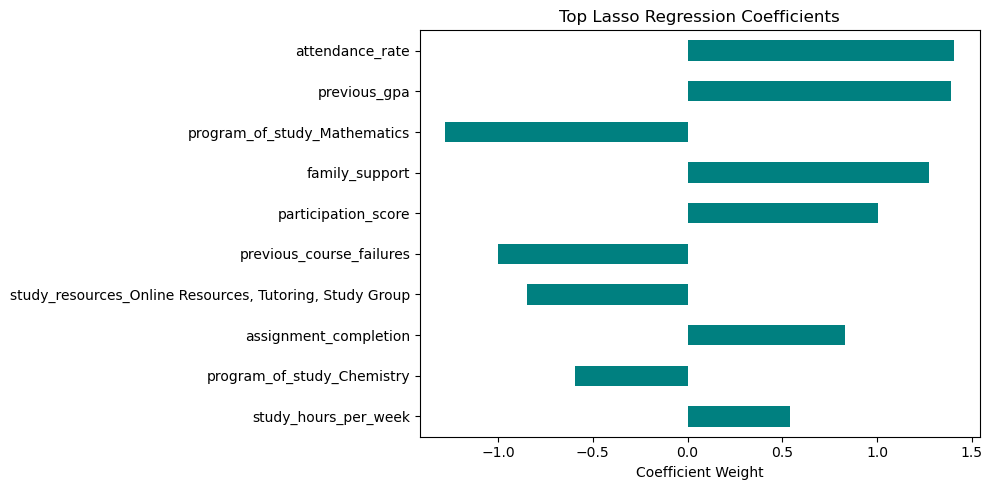

✅ Summary written to `step5_insights.md`.

In [18]:
# STEP 5: Prepare Train/Test and Analyze Lasso Model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from IPython.display import display, Markdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Split features and target
X = refined_df.drop(columns='final_grade')
y = refined_df['final_grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Define analysis function
def analyze_lasso_model(X_train, y_train, feature_names, top_n=10, alpha=0.01, output_file="step5_insights.md"):
    display(Markdown("# Step 5: Analysis & Interpretation"))

    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)

    coefs = pd.Series(model.coef_, index=feature_names)
    nonzero_coefs = coefs[coefs != 0].sort_values(key=np.abs, ascending=False)
    top_features = nonzero_coefs.head(top_n)

    # Display top features
    display(Markdown(f"### Top {top_n} Influential Features (Lasso Coefficients)"))
    display(top_features.to_frame("Weight"))

    # Plot
    plt.figure(figsize=(10, 5))
    top_features.plot(kind="barh", color="teal")
    plt.gca().invert_yaxis()
    plt.title("Top Lasso Regression Coefficients")
    plt.xlabel("Coefficient Weight")
    plt.tight_layout()
    plt.show()

    # Write insights to markdown file
    with open(output_file, "w") as f:
        f.write("# Step 5: Analysis & Interpretation\n\n")
        f.write("## Most Influential Predictors of Final Grade\n\n")
        for feat, weight in top_features.items():
            direction = "positive" if weight > 0 else "negative"
            f.write(f"- **{feat}** has a **{direction}** influence on `final_grade` (coefficient = {weight:.4f})\n")
        f.write("\n_These features were selected and retained by Lasso regression (alpha = {:.2f})._\n".format(alpha))

    display(Markdown(f"✅ Summary written to `{output_file}`."))

# 3. Run analysis
analyze_lasso_model(X_train, y_train, X_train.columns.tolist(), top_n=10, alpha=0.01)


In [19]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate_model(model, name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        "Model": name,
        "R²": r2_score(y_test, y_pred),
        "RMSE": mean_squared_error(y_test, y_pred, squared=False),
        "MAE": mean_absolute_error(y_test, y_pred)
    }

# Define ensemble models
ensemble_models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Stacking Regressor": StackingRegressor(
        estimators=[("ridge", Ridge()), ("lasso", Lasso(alpha=0.01))],
        final_estimator=RandomForestRegressor(n_estimators=50, random_state=42)
    )
}

# Evaluate all
ensemble_results = []
for name, model in ensemble_models.items():
    print(f"Training {name}...")
    result = evaluate_model(model, name, X_train, y_train, X_test, y_test)
    ensemble_results.append(result)

# Convert to DataFrame for Step 7
ensemble_df = pd.DataFrame(ensemble_results)
display(Markdown("## Step 6: Ensemble Model Results"))
display(ensemble_df.sort_values("R²", ascending=False).reset_index(drop=True))


Training Random Forest...
Training Gradient Boosting...


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Training Stacking Regressor...


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Step 6: Ensemble Model Results

,Model,R²,RMSE,MAE
0,Random Forest,0.512387,3.176703,2.196300
1,Gradient Boosting,0.474048,3.299227,2.316482
2,Stacking Regressor,0.378201,3.587269,2.104400


# Step 7: Feature Importance — Random Forest



## Top Features Influencing Final Grade



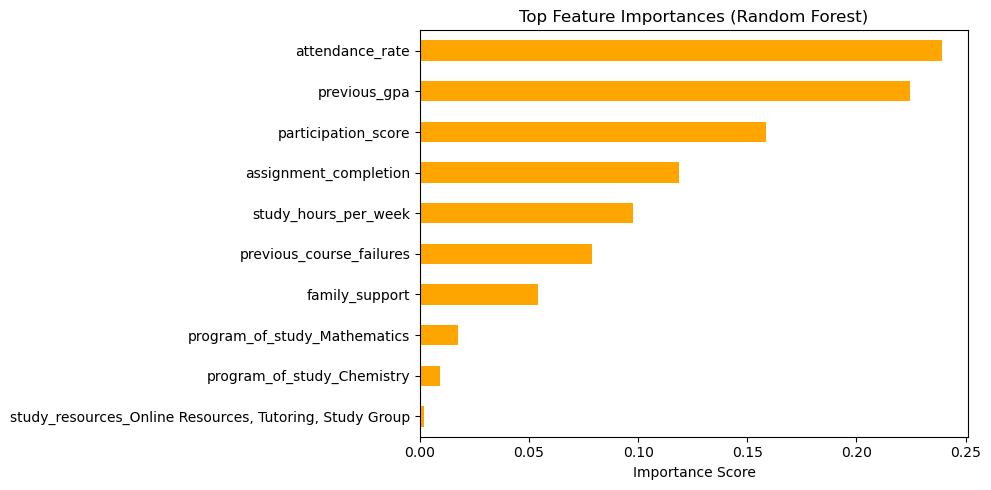

✅ Feature importance written to `step7_rf_feature_importance.md`

,Importance
attendance_rate,0.239257
previous_gpa,0.224553
participation_score,0.158734
assignment_completion,0.118607
study_hours_per_week,0.097576
previous_course_failures,0.078976
family_support,0.054282
program_of_study_Mathematics,0.017252
program_of_study_Chemistry,0.008974
"study_resources_Online Resources, Tutoring, Study Group",0.001789


In [25]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def interpret_random_forest(X_train, y_train, top_n=10, output_file="step7_rf_feature_importance.md"):
    """
    Train RandomForestRegressor and analyze feature importance.

    Parameters:
        X_train (DataFrame): Feature set
        y_train (Series): Target values
        top_n (int): Number of top features to display
        output_file (str): Markdown file for written insights
    """
    display(Markdown("# Step 7: Feature Importance — Random Forest\n\n"))
    display(Markdown("## Top Features Influencing Final Grade\n\n"))

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    importances = pd.Series(model.feature_importances_, index=X_train.columns)
    top_importances = importances.sort_values(ascending=False).head(top_n)

    # Plot
    plt.figure(figsize=(10, 5))
    top_importances.sort_values().plot(kind='barh', color="orange")
    plt.title("Top Feature Importances (Random Forest)")
    plt.xlabel("Importance Score")
    plt.tight_layout()
    plt.show()

    # Markdown report
    with open(output_file, "w") as f:
        f.write("# Step 7: Feature Importance — Random Forest\n\n")
        f.write("## Top Features Influencing Final Grade\n\n")
        for feat, score in top_importances.items():
            f.write(f"- **{feat}** has an importance score of **{score:.4f}**\n")
        f.write("\n_These scores reflect how frequently and effectively each feature is used to split decision trees._\n")

    display(Markdown(f"✅ Feature importance written to `{output_file}`"))
    display(top_importances.to_frame("Importance"))

# Run interpretation
interpret_random_forest(X_train, y_train, top_n=10)


Training LinearRegression...
Training RidgeRegression...
Training LassoRegression...
Training Random Forest...
Training Gradient Boosting...


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

Training Stacking Regressor...


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Step 7: Combined Model Comparison

,Model,R²,RMSE,MAE
0,Random Forest,0.512387,3.176703,2.196300
1,LassoRegression,0.494676,3.233881,2.397951
2,RidgeRegression,0.493031,3.239140,2.419480
3,LinearRegression,0.485802,3.262152,2.449734
4,Gradient Boosting,0.474048,3.299227,2.316482
5,Stacking Regressor,0.378201,3.587269,2.104400


C:\Users\52754\AppData\Local\Temp\ipykernel_6644\1873490727.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=all_models_df, x="R²", y="Model", palette="crest")


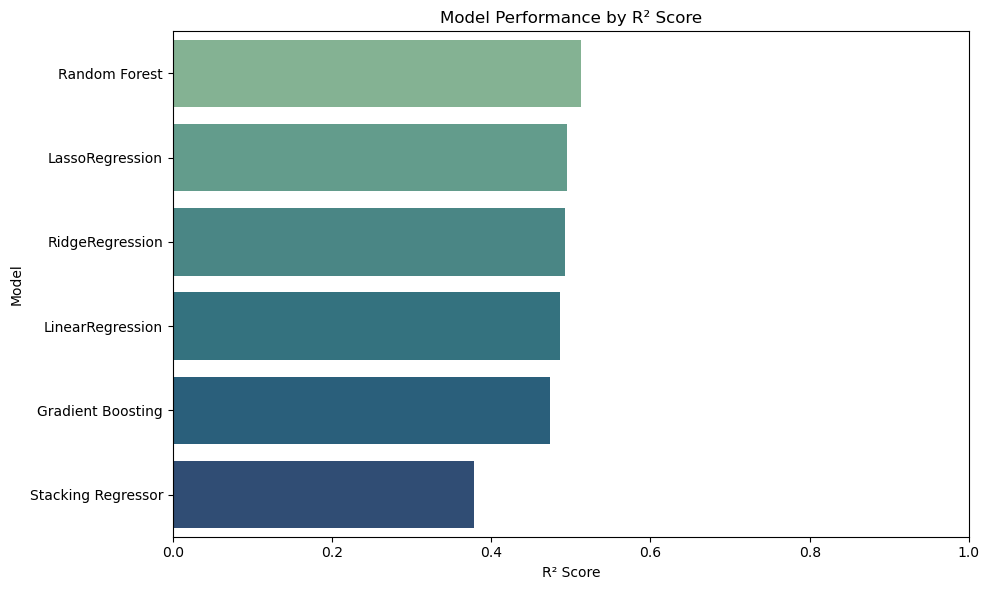

In [23]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Define reusable evaluation function
def evaluate_model(model, name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        "Model": name,
        "R²": r2_score(y_test, y_pred),
        "RMSE": mean_squared_error(y_test, y_pred, squared=False),
        "MAE": mean_absolute_error(y_test, y_pred)
    }

# 2. Define all models
models = {
    "LinearRegression": LinearRegression(),
    "RidgeRegression": Ridge(alpha=1.0),
    "LassoRegression": Lasso(alpha=0.01),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Stacking Regressor": StackingRegressor(
        estimators=[("ridge", Ridge()), ("lasso", Lasso(alpha=0.01))],
        final_estimator=RandomForestRegressor(n_estimators=50, random_state=42)
    )
}

# 3. Train and evaluate all models
results = []
for name, model in models.items():
    print(f"Training {name}...")
    result = evaluate_model(model, name, X_train, y_train, X_test, y_test)
    results.append(result)

# 4. Display results
all_models_df = pd.DataFrame(results).sort_values(by="R²", ascending=False).reset_index(drop=True)

display(Markdown("## Step 7: Combined Model Comparison"))
display(all_models_df)

# 5. Plot R² Scores
plt.figure(figsize=(10, 6))
sns.barplot(data=all_models_df, x="R²", y="Model", palette="crest")
plt.title("Model Performance by R² Score")
plt.xlabel("R² Score")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


In [ ]:
import joblib

# 1. Identify the best model name (based on previous results table)
best_model_name = all_models_df.iloc[0]['Model']
print(f"✅ Best model is: {best_model_name}")

# 2. Match model object from original dictionary
best_model = models[best_model_name]

# 3. Retrain on ALL data (X + y)
best_model.fit(X, y)

# 4. Save to disk
joblib.dump(best_model, "best_model.pkl")

print("📦 Model saved to 'best_model.pkl'")

# Load the model for prediction, assuming X_new is a new data sample
'''import joblib
loaded_model = joblib.load("best_model.pkl")
predictions = loaded_model.predict(X_new)'''



✅ Best model is: Random Forest
📦 Model saved to 'best_model.pkl'
